In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('2000_2021_Brazilian_Northeast_Region_daily_MW_instantaneous_maximum_demand_series.csv - 2000_2021_Brazilian_Northeast_Region_daily_MW_instantaneous_maximum_demand_series_train.csv', parse_dates=['data'], index_col='data')

In [13]:
##Add frequency
df = df.asfreq('D')

In [17]:
#Checking for Nulls / EDA 
nulls = df['energia'].isnull().sum()
print (f'The numbers of nulls: {nulls}')

The numbers of nulls: 2


In [18]:
#Replace the Null with the next value
df = df.bfill()

In [19]:
#Checking for Nulls / EDA 
nulls = df['energia'].isnull().sum()
print (f'The numbers of nulls: {nulls}')

The numbers of nulls: 0


In [20]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df, model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df, model='additive', extrapolate_trend='freq')

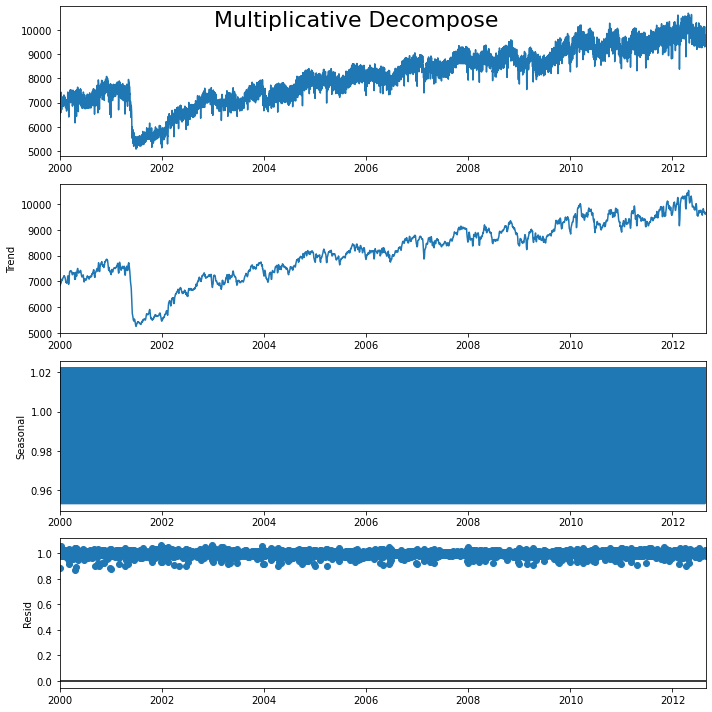

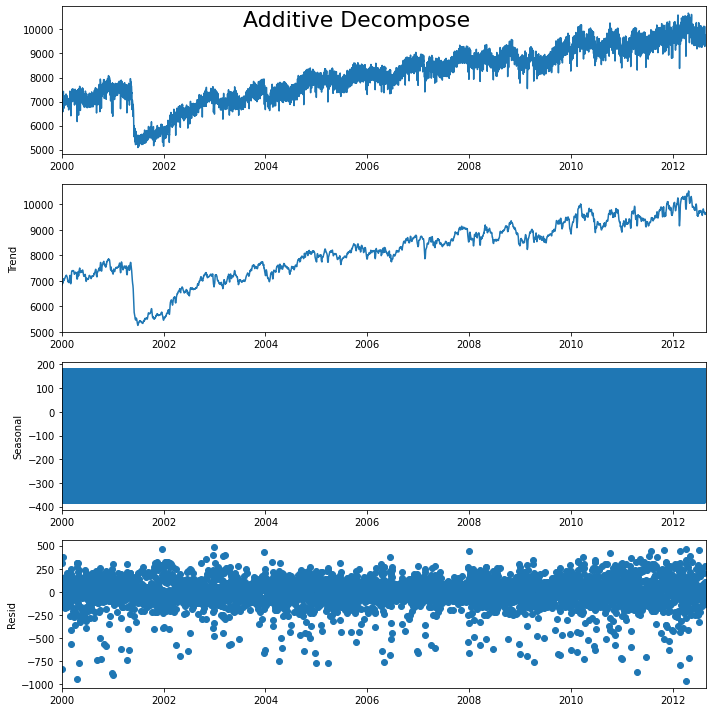

In [21]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [9]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
data,,,,
2000-01-01 00:00:00,0.962284,3169.445556,0.794287,2422.5
2000-01-01 01:00:00,0.933446,3172.112896,0.935259,2769.3
2000-01-01 02:00:00,0.913192,3174.780235,1.077786,3124.7
2000-01-01 03:00:00,0.902797,3177.447575,1.099704,3154.6
2000-01-01 04:00:00,0.899873,3180.114915,1.090890,3121.8
